# AI Fall 2022 - A4 - Decision Tree
## Your info

**Student Name:** Hossein Goli

**Student Id:** 99102123

## Practical Question - Decision Tree (25 + 5 points)
In this question you will first write a program to find an appropriate order of features for training a decision tree based on information gain. In the second part, you will use existing implementations to train and tune a classifier using GridSearch on the given dataset. And try to finish this in <15 mins.

### Import
Import the libraries you need in the next cell.

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

### Part A (20 points)
Consider the following dataframe and answer the following questions:

In [139]:
df = pd.DataFrame({
    'Race': [1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'Sex': [1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0],
    'Age': [43.0, 72.0, 4.0, 59.0, 34.0, 55.0, 41.0, 39.0, 6.0, 77.0, 67.0, 35.0, 45.0, 39.0, 32.0, 57.0, 99.0, 68.0, 47.0, 28.0],
    'BMI': [25.803, 33.394, 20.278, 32.918, 30.743, 37.734, 23.725, 20.722, 19.452, 22.044, 17.481, 18.918, 28.578, 19.214, 23.562, 23.446, 21.872, 20.691, 25.471, 25.82],
    'Smoker': [1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
    'Label': [False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, True, False],
})

df.head()

,Race,Sex,Age,BMI,Smoker,Label
0,1.0,1.0,43.0,25.803,1.0,False
1,2.0,2.0,72.0,33.394,0.0,True
2,1.0,2.0,4.0,20.278,1.0,False
3,1.0,2.0,59.0,32.918,0.0,False
4,1.0,2.0,34.0,30.743,1.0,False


#### QA.1 (10 points)
Complete the following function that calculates and returns the list of features based on their information gain.

In [140]:
def feature_order(X_data, y_data):
    '''
    Calculate the best feature order
    for training a decision tree based on
    information gain.
    Input:
        X_data (pd.DataFrame) contains data features
        y_data (pd.Series) contains the labels
    Output:
        order (list[str]): The `X_data` columns in the correct order
    '''
    order = list(X_data.columns)
    igs = []
    for i in range(len(order)):
        features = X_data.iloc[:, i]
        thresholds = np.unique(features)
        thresholds = np.sort(thresholds)
        thresholds = [(features[j] + features[j + 1]) / 2 for j in range(len(features) - 1)]
        max_ig = 0
        for threshold in thresholds:
            ig = information_gain(X_data, y_data, i, threshold)
            if ig > max_ig:
                max_ig = ig
        igs.append(max_ig)

    igs = np.array(igs)
    igs = np.argsort(igs)
    counter = 0
    for idx in igs:
        order[counter] = df.columns[idx]
        counter += 1
    return order[::-1]

def entropy(y):
        if len(y) == 0:
            return 0
        prob = sum(y) / len(y)
        if prob == 1 or prob == 0:
            return 0
        return -prob * log2(prob) - (1 - prob) * log2(1 - prob)

def split(X, y, feature, threshold):  # TODO: check if this is correct
    left_indexes = X.iloc[:, feature] <= threshold
    right_indexes = ~left_indexes
    X_left = X[left_indexes]
    y_left = y[left_indexes]
    X_right = X[right_indexes]
    y_right = y[right_indexes]
    return X_left, X_right, y_left, y_right

def information_gain(X, y, feature, threshold):
    X_left, X_right, y_left, y_right = split(X, y, feature, threshold)
    H_y = entropy(y)
    H_y_left = entropy(y_left)
    H_y_right = entropy(y_right)
    ig = H_y - (len(y_left) / len(y)) * H_y_left - (len(y_right) / len(y)) * H_y_right
    return ig

print(feature_order(df.iloc[:, :-1], df.Label))

['Age', 'BMI', 'Race', 'Smoker', 'Sex']


#### QA.2 (5 points)
What are some of the effective approaches to prevent the tree from overfitting? (three approaches)

<font color=#183364>
    <i>
        Answer.
        <ol>
            <li>Pruning the tree</li>
            <li>Using Ensemble Methods Such as RandomForest</li>
            <li>Boosting and Bagging</li>
        </ol>
    </i>
</font>

#### QA.3 (5 points)
About the `Age` feature which is an integer-valued input attribute, how can a tree utilize it for classification? Write a small piece of code to find the answer for this specific column.

<font color=#183364>
    <i>
        I have already implemented it in the above code. we simply have to use the middle point beetween sorted feature values as theresholds for spliting the tree
    </i>
</font>

In [141]:
# Your code here
feature = 'Age'
feature_idx = df.columns.get_loc(feature)
X_data = df.iloc[:, :-1]
y_data = df.iloc[:, -1]
features = X_data.iloc[:, feature_idx]
thresholds = np.unique(features)
thresholds = np.sort(thresholds)
thresholds = [(features[j] + features[j + 1]) / 2 for j in range(len(features) - 1)]
max_ig = 0
dict_to_show = {}
for threshold in thresholds:
    ig = information_gain(X_data, y_data, feature_idx, threshold)
    if ig > max_ig:
        max_ig = ig
    dict_to_show[threshold] = ig
df_to_show = pd.DataFrame.from_dict(dict_to_show, orient='index', columns=['IG'])
print(df_to_show)

            IG
57.5  0.032268
38.0  0.117744
31.5  0.052870
46.5  0.275944
44.5  0.236453
48.0  0.091864
40.0  0.170951
22.5  0.034144
41.5  0.201815
72.0  0.034144
51.0  0.091864
42.0  0.201815
35.5  0.117744
78.0  0.016565
83.5  0.016565
37.5  0.117744


### Part B (10 points)
In this part you will learn more about [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and use it to train a classifier and tune its parameters.

#### QB.1 (5 points)
For measuring the _accuracy_ of your models, choose a subset of the given dataset as your validation set (Check out [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [142]:
# Your code here
## Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.4, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12, 5) (8, 5) (12,) (8,)


In [143]:
# Your code here
## Set your own hyperparameters below, such as:
dt_hyperparams = {
    'min_samples_split': 2,
    'criterion': 'entropy',
    'max_depth': 2,
    'min_samples_leaf': 2,
    'max_leaf_nodes': 8,
}
dt_hyperparams = {'criterion': 'entropy', 'max_depth': 2, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 2}
model = DecisionTreeClassifier(**dt_hyperparams)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.62


#### QB.2 (5 points)
Take a look at customizable and potentially useful input params of the model, define a range for each of their values, and use GridSearch (Feel free to implement/[import](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) it) and find a set of hyperparametetrs that work best among your candidates.

In [144]:
# Your code here
dt_hyperparams = {
    'min_samples_split': [2, 3],
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 3, 4],
    'max_leaf_nodes': [2, 6, 8]
}

model = DecisionTreeClassifier()
hyper_param_cv = GridSearchCV(model, dt_hyperparams, cv=5, scoring='accuracy')
hyper_param_cv.fit(X_train, y_train)
print(hyper_param_cv.best_params_)
print(hyper_param_cv.best_score_)
print(hyper_param_cv.best_estimator_)

C:\Users\hogo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'criterion': 'entropy', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
0.8666666666666666
DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=2,
                       min_samples_leaf=2)


### The model achieved 87% accuracy

#### QB.3 (5 extra points)
Visualize the tree splits and interpret it (Hint: Search about `IPython.display.Image`, `pydotplus`, `StringIO`, and `export_graphviz`).

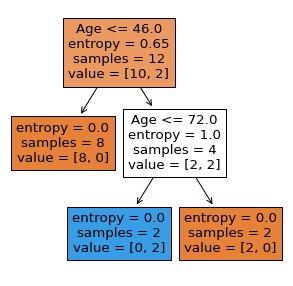

In [145]:
#I didnt visulaize the best model because it i wanted to show a tree with bigger depth the best model can use one nodel to classify all the data and has 
#depth of 1 and 86% accuracy
X_data = df.iloc[:, :-1]
y_data = df.iloc[:, -1]
dt_hyperparams = {
    'min_samples_split': 2,
    'criterion': 'entropy',
    'max_depth': 5,
    'min_samples_leaf': 1,
    'max_leaf_nodes': 4,
}
model = DecisionTreeClassifier(**dt_hyperparams)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
fig = plt.figure(figsize=(5,5))
_ = plot_tree(model, 
                   feature_names=X_data.columns,  
                   filled=True)